> We are going to use the `USA_Housing` or `sample_data/california_housing...` dataset. Since house price is a continues variable, this is a regression problem. The data contains the following columns:

> * '`Avg. Area Income`': Avg. Income of residents of the city house is located in.
> * '`Avg. Area House Age`': Avg Age of Houses in same city
> * '`Avg. Area Number of Rooms`': Avg Number of Rooms for Houses in same city
> * '`Avg. Area Number of Bedrooms`': Avg Number of Bedrooms for Houses in same city
> * '`Area Population`': Population of city hou  se is located in
> * '`Price`': Price that the house sold at
> * '`Address`': Address for the house

Let's try and create a model that can predict the price of a house based on the variables and historical data


# Import standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Explore the data a bit.
### List:

1.   First few rows
2.   Basic statistic
3.   .info()
4.   Column names

Questions:

1. What is the dependent variable (column name)?
2. What are the independent variables?
3. Should we normalize the data?
4. What are the column data-types?

In [2]:
df = pd.read_csv('USA_housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Exploratory Data Analysis (EDA)

Create some simple plots to check out the data!

1.   Plot the pairwise scatter-plot between each column
2.   Plot the distribution of the values of the dependent variable
3.   Plot the pairwise correlation heatmap of each column.

Answer questions:

1.  What are the assumptions of the linear regression model?
2.  Can we accept the basic assumptions of the linear regression model?
3.  Judging by the scatter-plots, do you see any patterns in the data?
4.  Judging by the correlation heat-map, is there correlation between the dependent variable and the independent variables?
5.  Are there correlations among independent variables?


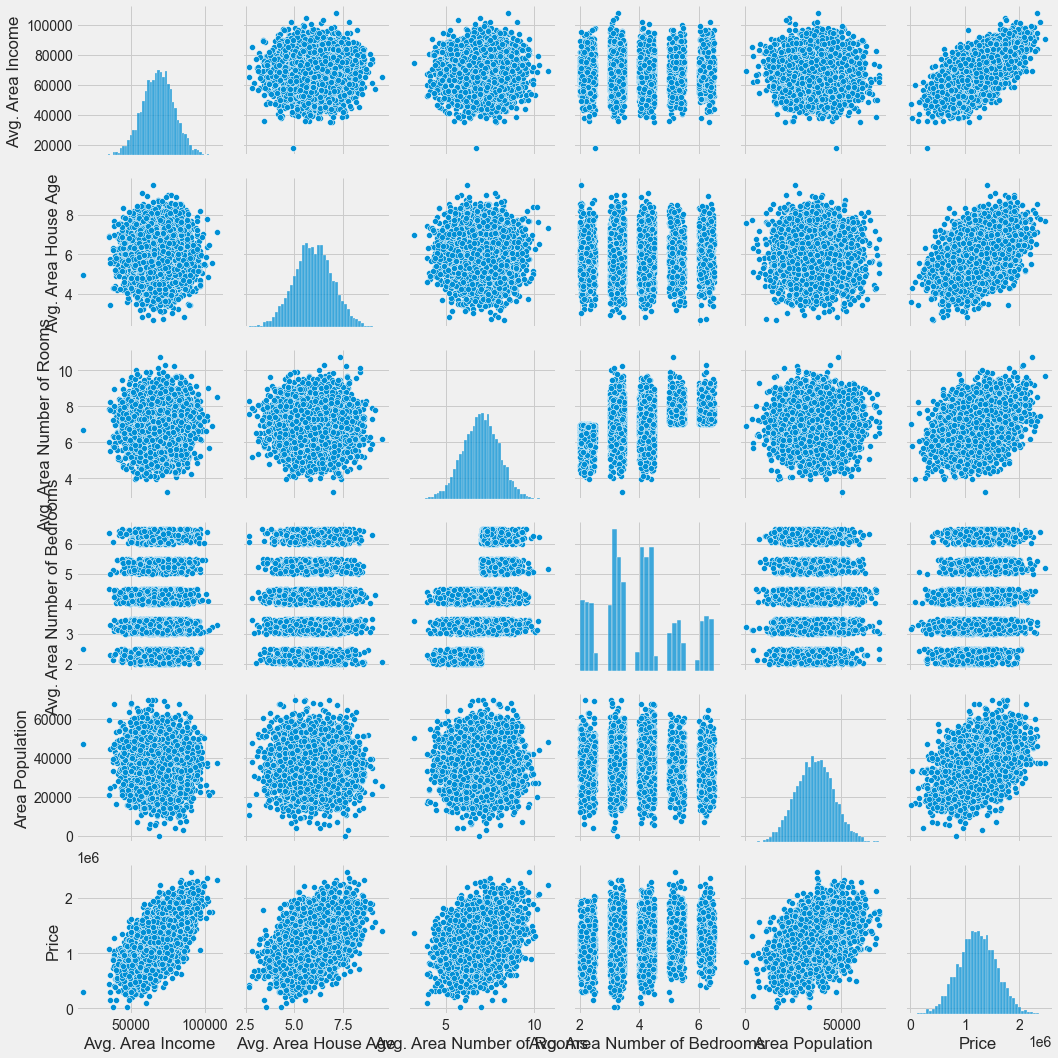

In [3]:
sns.pairplot(
    data=df)

<AxesSubplot:xlabel='Price', ylabel='Count'>

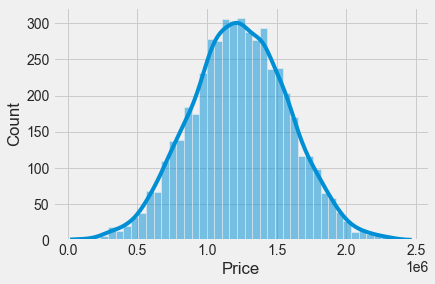

In [4]:
sns.histplot(df['Price'], kde=True)

<AxesSubplot:>

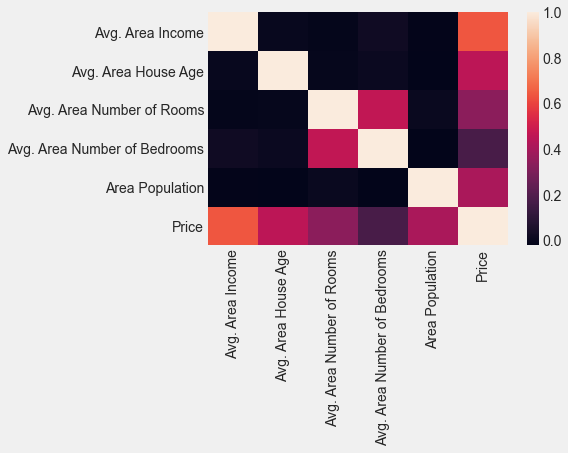

In [5]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

##### What are the assumptions of the linear regression model?
We assume that the price of the housing can be expressed as a linear function of an independent variable in the dataset, and that the price is a mean of a normal distribution with a certain variance E that is used to model the error.
We therefore expect that:
- the relationship between the price and the independent variable is linear
- the price is the mean of a normal distribution, no matter the value of the independent variable
- the variance of the residual E is the same for any value of the independent variable
- the independent variables are not highly correlated to each other

##### Can we accept the basic assumptions of the linear regression model?
From the plots we can see that the the price is normally distributed and we can already see some linear relationships between independent variables and price. All variables seem to be normally distributed except for the number of bedrooms, and they are all independent of each other except for rooms and bedrooms. So, excluding the avg amount of bedrooms, we can accept the assumptions.
##### Judging by the scatter-plots, do you see any patterns in the data?
I can see a probable linear relationship between the average income in the area and the price. Some weaker linear relationships can be observed also with the area house age and population, whereas the average number of rooms and bedrooms doesnt seem to have any correlation.
##### Judging by the correlation heat-map, is there correlation between the dependent variable and the independent variables?
Yes, there is a fairly good correlation between the average income in the area and the price of the house.
##### Are there correlations among independent variables?
There's a weak correlation between the average number of rooms and the average number of bedrooms, but all the other variables are independent of each other.

# Training a Linear Regression Model
## X and y arrays

Tasks:

1. Split the data-frame into an `X` array and and `y` array
2. Are all columns useful for linear regression? Is there some that should be excluded? Exclude the useless ones

In [6]:
# exclude the address, leave price for the predictions
X = df.drop(['Price', 'Address'], axis=1).to_numpy()
y = df['Price'].to_numpy()

## Train / Test Split

We need to split the data into the train and test subsets.

In [7]:
# Split the data here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3750, 5)
(1250, 5)
(3750,)
(1250,)


In [8]:
from sklearn import metrics

def print_evaluate(true, predicted):
    mae, mse, rmse, r2_square = evaluate(true, predicted)
    #Print mean absolute error
    print('MAE:', mae)
    #Print mean square error
    print('MSE:', mse)
    # Print root square error
    print('RMSE:', rmse)
    # Print R2 score
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    diff = predicted - true
    mae = np.mean(abs(diff))
    mse = np.mean(diff ** 2)
    rmse = np.sqrt(mse)
    r2_square = 1-(sum(diff ** 2)/sum((true - np.mean(true))**2))

    # Fill in the code necessary to calculate these metrics and use this
    # function to print them in the previous function
    return mae, mse, rmse, r2_square

# Preparing Data For Linear Regression
> Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

> As such, there is a lot of sophistication when talking about these requirements and expectations. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

> Try different preparations of your data using these heuristics and see what works best for your problem.

Assess the following steps using the plots you made earlier and answer whether the assumtions and conditions are being met:

- **Linear Assumption.** Linear regression assumes that the relationship between your input and output is linear. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).

Answer: From the plots it seems that all relationships are linear, so I don't neet to transform the data.

- **Rescale Inputs:** Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

Answer: Since the numerical inputs have very wide ranges, they should be scaled with standardization (which is less sensitive to outliers than normalization, and there are a fair amount of outliers in the data).

- **Remove Collinearity.** Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.

Answer: I have already removed the correlated input variables, so it should be fine.

- **Gaussian Distributions.** Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.

Answer: The remaining variables are already normally distributed, so there is no need for further processing.


In [9]:
# Hint:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline_std = Pipeline([
    ('std_scaler', StandardScaler())
])
X_train_std = pipeline_std.fit_transform(X_train)
X_test_std = pipeline_std.fit_transform(X_test)

# Linear Regression

Take the most correlated dependent/independent pair and calculate the `beta` parameters for Simple linear regression.

Use `skitlearn` to fit the linear model and see if your calculation corresponds to what the library did.

Use `skitlearn` to fit the linear model dependent on all independent variables (normalize inputs).

B1 estimate : 229054.02159730496
B0 estimate : 1229751.217912332


Text(0, 0.5, 'price')

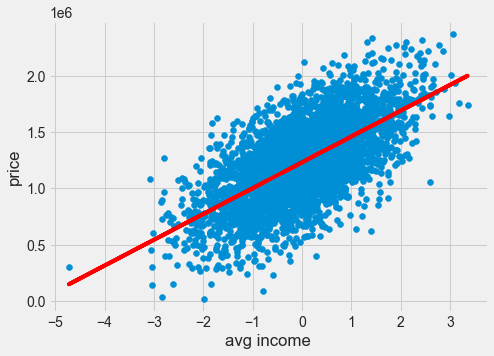

In [10]:
x = X_train_std[:, 0]
y = y_train
x_mean = x.mean()
y_mean = y.mean()
beta1 = ((x - x_mean)*(y - y_mean)).sum() / ((x - x_mean)**2).sum()
print("B1 estimate : " + str(beta1))
beta0 = y_mean - beta1 * x_mean
print("B0 estimate : " + str(beta0))
plt.figure(figsize=(7,5))
plt.scatter(x, y)
plt.plot(x, beta1 * x + beta0, c='r')
plt.xlabel("avg income")
plt.ylabel("price")

In [11]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train_std[:,0].reshape(-1, 1), y_train)
print('Beta estimates:')
print(f'est B0: {beta0}')
print(f'est B1: {beta1}')
print('Actual betas:')
print(f'B0: {lg.intercept_}')
print(f'B1: {lg.coef_[0]}')

Beta estimates:
est B0: 1229751.217912332
est B1: 229054.02159730496
Actual betas:
B0: 1229751.217912332
B1: 229054.02159730493


In [12]:
lg_all = LinearRegression()
lg_all.fit(X_train_std, y_train)
print('With all independent variables:')
print(f'B0: {lg_all.intercept_}')
print(f'B1: {lg_all.coef_}')

With all independent variables:
B0: 1229751.2179123322
B1: [232765.8717704  163412.51613757 120591.52466393   2548.01575694
 151817.64416991]


## Model Evaluation

Check the model coefficients and and describe how can we interpret them.

In [13]:
scales = pipeline_std.named_steps['std_scaler'].scale_
np.set_printoptions(precision=3, suppress=True)
print(f"Scales: {scales}")
print(f"B1: {lg_all.coef_ / scales}")

Scales: [10364.515     0.998     0.993     1.271  9753.74 ]
B1: [    22.458 163782.493 121465.956   2004.695     15.565]


Tasks:

Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of 22.458**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of 163782.493**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of 121465.956**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of  2004.695**.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of 15.565**.

## Predictions from our Model

Tasks:

1.  Take the test data and plot the predicted vs. true value scatter plot.

2.  Plot the histogram of residual values

3.  Make a scatter plot of residuals depending on the predicted value.

Text(0, 0.5, 'prediction')

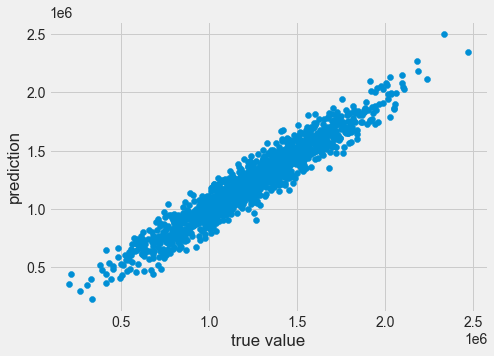

In [14]:
predicted = lg_all.predict(X_test_std)
true = y_test
plt.figure(figsize=(7,5))
plt.scatter(true, predicted)
plt.xlabel("true value")
plt.ylabel("prediction")

(array([ 16.,  60., 144., 266., 280., 271., 144.,  53.,  14.,   2.]),
 array([-275401.298, -211917.43 , -148433.562,  -84949.694,  -21465.826,
          42018.042,  105501.911,  168985.779,  232469.647,  295953.515,
         359437.383]),
 <BarContainer object of 10 artists>)

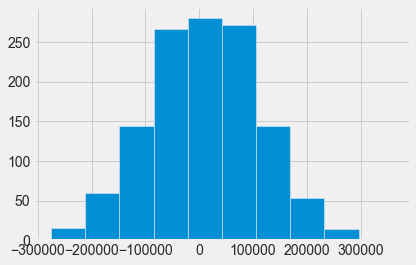

In [15]:
residuals = true - predicted
plt.hist(residuals)

Text(0, 0.5, 'residual')

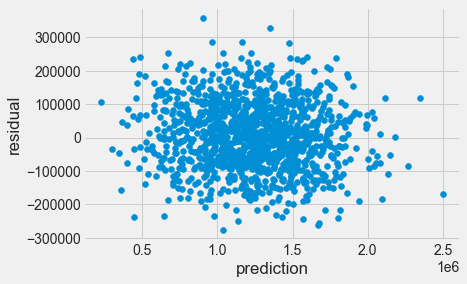

In [16]:
plt.scatter(predicted, residuals)
plt.xlabel("prediction")
plt.ylabel("residual")

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
    - **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, and is easier to calculate derivations.
- **RMSE** RMSE is more interpretable.

> All of these are **loss functions**, and we want to minimize them.


Tasks:

1.  What is the interpretation of the $R^2$ score?
**Answer**: the R-squared score represents the extent to which the variance of the independent variable explains the variance of the dependend variable; for example, a R-squared of 0.75 means that about 75% of the observed variations in the depended variable can be explained by the model's independent variable(s).

2.  Pack these values into a Pandas data frame

In [17]:
print_evaluate(true, predicted)
mae, mse, rmse, r_square = evaluate(true, predicted)
df_e = pd.DataFrame(
    data={
        'mae' : [mae],
        'mse' : [mse],
        'rmse' : [rmse],
        'r_square' : [r_square]
    },
    columns=['mae', 'mse', 'rmse', 'r_square']
)
df_e.head()

MAE: 81608.03347176094
MSE: 10151895406.642689
RMSE: 100756.61470416069
R2 Square 0.9152060067476291
__________________________________


,mae,mse,rmse,r_square
0,81608.033472,1.015190e+10,100756.614704,0.915206


# Polynomial Regression
> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

***

> One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

> For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

> If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

> The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

> With this re-labeling of the data, our problem can be written

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

> We see that the resulting polynomial regression is in the same class of linear models we’d considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.
***

Tasks:

1.  Fit the data to polynomial model of degree 2
2.  Repeat the analysis from the simple regression and show the loss functions
3.  Did polynomoial regression improve the fit? how did you come to that conclusion?

In [18]:
# Hint:
from sklearn.preprocessing import PolynomialFeatures


# Artficial Neural Networks



Tasks:

1.  Build a neural network using Keras or PyTorch and fit the weights to predict the house price.

2.  Train the neural network for 100 epochs.

3.  What are the losses compared to the linear model?

4.  Is the neural network performin better or worse?

The neural network performs slightly worse than the linear regression model.

In [56]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train_std, y_train, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
118/118 - 3s - loss: 1638138904576.0000
Epoch 2/100
118/118 - 0s - loss: 1620216250368.0000
Epoch 3/100
118/118 - 0s - loss: 1488777510912.0000
Epoch 4/100
118/118 - 0s - loss: 1087410929664.0000
Epoch 5/100
118/118 - 0s - loss: 494115258368.0000
Epoch 6/100
118/118 - 0s - loss: 137902260224.0000
Epoch 7/100
118/118 - 0s - loss: 64677232640.0000
Epoch 8/100
118/118 - 0s - loss: 50296270848.0000
Epoch 9/100
118/118 - 0s - loss: 43717251072.0000
Epoch 10/100
118/118 - 0s - loss: 39369850880.0000
Epoch 11/100
118/118 - 0s - loss: 35894980608.0000
Epoch 12/100
118/118 - 0s - loss: 32933457920.0000
Epoch 13/100
118/118 - 0s - loss: 30312523776.0000
Epoch 14/100
118/118 - 0s - loss: 27937323008.0000
Epoch 15/100
118/118 - 0s - loss: 25812359168.0000
Epoch 16/100
118/118 - 0s - loss: 23962007552.0000
Epoch 17/100
118/118 - 0s - loss: 22258839552.0000
Epoch 18/100
118/118 - 0s - loss: 20783255552.0000
Epoch 19/100
118/118 - 0s - loss: 19441070080.0000
Epoch 20/100
118/118 - 0s - lo

In [57]:
pred = model.predict(X_test_std).squeeze()
true = y_test
print_evaluate(true, pred)
mae, mse, rmse, r_square = evaluate(true, pred)
df_enn = pd.DataFrame(
    data={
        'mae' : [mae],
        'mse' : [mse],
        'rmse' : [rmse],
        'r_square' : [r_square]
    },
    columns=['mae', 'mse', 'rmse', 'r_square']
)
print(df_e.head())
print(df_enn.head())

MAE: 82177.59745754367
MSE: 10285498653.300081
RMSE: 101417.4474797117
R2 Square 0.9140900818546134
__________________________________
            mae           mse           rmse  r_square
0  81608.033472  1.015190e+10  100756.614704  0.915206
            mae           mse          rmse  r_square
0  82177.597458  1.028550e+10  101417.44748   0.91409
